In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

lon_path = './data/lights-on/0.txt'
toff_path = './data/turn-off/0.txt'
t_path = '../speech_recognition/data/test/audio/clip_f14da8108.wav'

In [2]:
class get_data:
    def __init__(self, path):
        self.df = pd.read_csv(path, index_col=0)
        
    def draw_plot(self):
        fig = plt.figure(figsize=(14, 12))

        ch1 = fig.add_subplot(411)
        ch1.set_title('ch1 wave')
        ch1.plot(self.df['ch1'])

        ch2 = fig.add_subplot(412)
        ch2.set_title('ch2 wave')
        ch2.plot(self.df['ch2'])

        ch3 = fig.add_subplot(413)
        ch3.set_title('ch3 wave')
        ch3.plot(self.df['ch3'])

        ch4 = fig.add_subplot(414)
        ch4.set_title('ch4 wave')
        ch4.plot(self.df['ch4'])

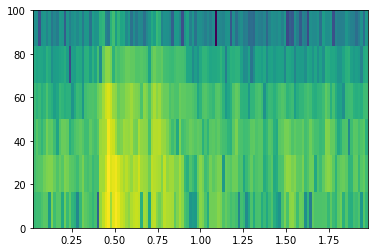

In [10]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

# d = np.pad(l_on.df['ch1'], (400, 0), mode='constant')
# print(d)
# print(l_on.df['ch1'].size)
# print(l_on.df['ch1'])

freqs, times, spectrogram = log_specgram(l_on.df['ch1'], 200, window_size=50, step_size=35)
plt.imshow(spectrogram.T, aspect='auto',origin='lower', extent=[times.min(), times.max(), freqs.min(), freqs.max()])

# plt.specgram(l_on.df['ch3'].values, Fs=200)
# plt.show()

# print(l_on.df['ch1'])
# plt.set_yticks(freqs[::16])
# plt.set_xticks(times[::16])

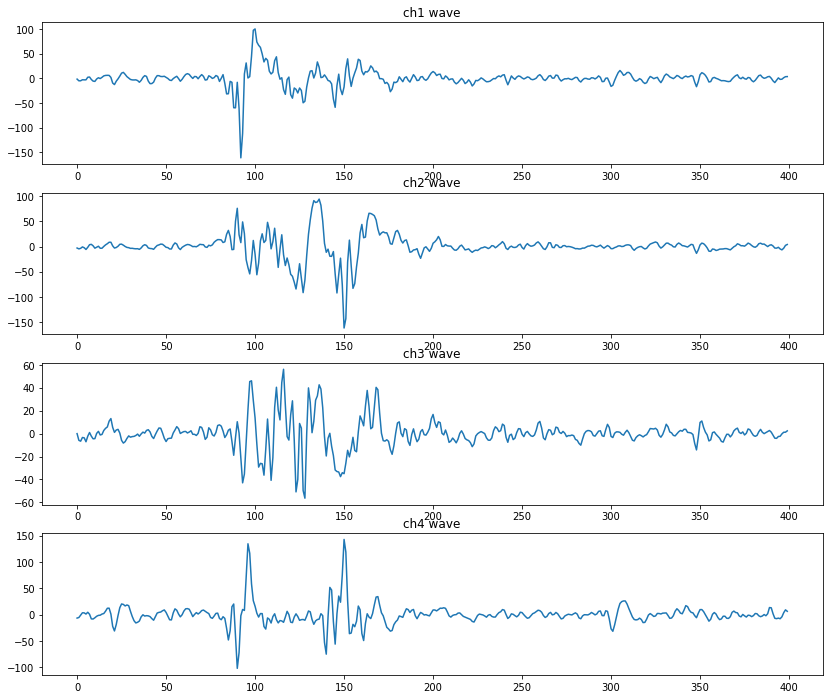

In [4]:
l_on = get_data(lon_path)
l_on.draw_plot()

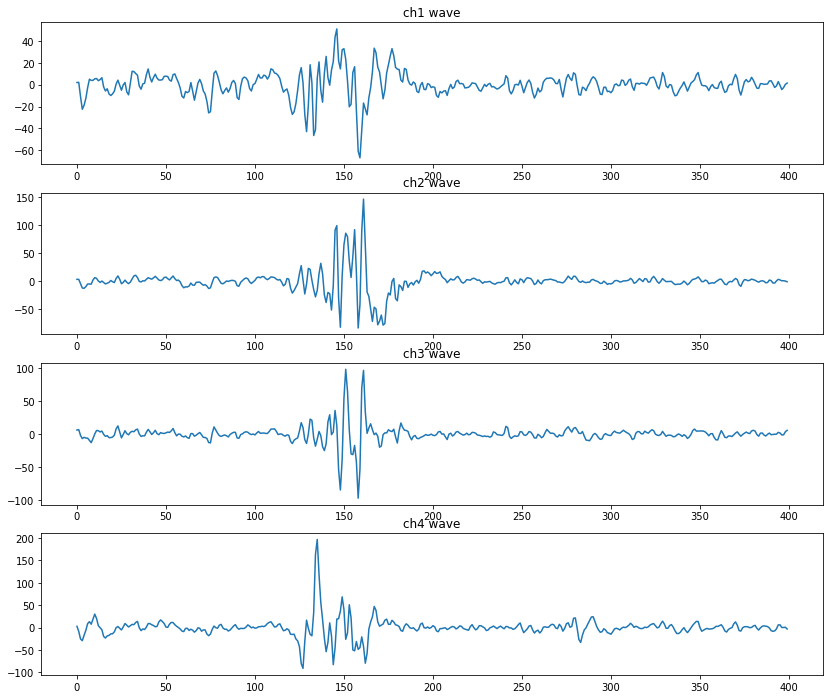

In [52]:
t_off = get_data(toff_path)
t_off.draw_plot()

In [54]:
l_on.df.iloc[:350]

,ch1,ch2,ch3,ch4
0,-1.49,-2.95,-0.02,-6.58
1,-4.96,-4.68,-5.86,-5.47
2,-4.91,-3.57,-6.60,-1.15
3,-2.85,-0.79,-3.38,3.49
4,-3.04,-2.41,-3.67,3.29
5,-2.99,-5.83,-7.10,1.10
6,2.28,-1.56,-2.26,4.47
7,2.73,3.61,0.95,0.68
8,-2.23,4.30,-2.22,-8.06
9,-5.58,1.39,-4.53,-8.33
